In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('kaggle_bike_train.csv', parse_dates=['datetime'])
test = pd.read_csv('kaggle_bike_test.csv', parse_dates=['datetime'])

In [5]:
print(train.shape)
# print(train.describe)
# print(train.columns)

(10886, 12)


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [68]:
print(test.shape)
print(test.info())
print(test.describe())
print(test.columns)

(6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB
None
            season      holiday  ...     humidity    windspeed
count  6493.000000  6493.000000  ...  6493.000000  6493.000000
mean      2.493300     0.029108  ...    64.125212    12.631157
std       1.091258     0.168123  ...    19.293391     8.250151
min       1.000000     0.000000  ...    16.000000     0.000000
25%       2.000000     0.000000  ...    49.000000     7.001500
50%       3.000000     0.000000  ...    65.000000    11.001400
75%       3.000000     0.000000  ...    81.000

In [12]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


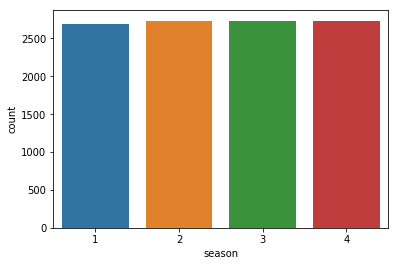

In [16]:
sns.countplot(x=train.season, data=train)

In [0]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = train.corr(), annot=True  )

In [0]:

col = ['atemp','humidity','windspeed']
x_train = train[col]
y_train = train['count']

In [31]:
x_train.head()

,atemp,humidity,windspeed
0,14.395,81,0.0
1,13.635,80,0.0
2,13.635,80,0.0
3,14.395,75,0.0
4,14.395,75,0.0


In [32]:
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [0]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [34]:
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
new_test = test[col]

In [0]:
y_pred = model.predict(new_test)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [134]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1=  model1.predict(new_test)
y_pred1

array([117.07889251, 117.94399617, 117.94399617, ..., 108.2774996 ,
       124.00574785,  99.33706466])

In [40]:
model2 = KNeighborsRegressor()
model2.fit(x_train, y_train)
y_pred2=  model2.predict(new_test)
y_pred2

array([171.6,  24. ,  24. , ..., 136. ,  97. ,  94.6])

In [41]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)
y_pred3=  model3.predict(new_test)
y_pred3

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([177.1       ,  55.87047619,  55.87047619, ..., 173.8       ,
       106.43333333,  69.90099206])

# EDA

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

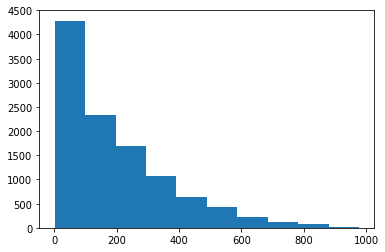

In [42]:
plt.hist(train['count'])

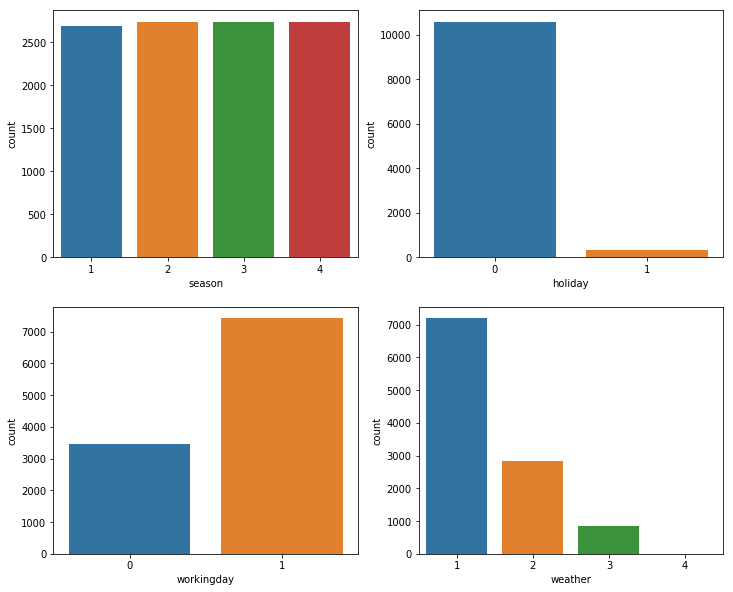

In [45]:
col_names = [ 'season', 'holiday', 'workingday', 'weather' ]
i = 0
plt.figure(figsize=(12,10))
for name in col_names:
  i = i + 1
  plt.subplot(2,2,i)
  sns.countplot(name, data=train)
  
plt.show()

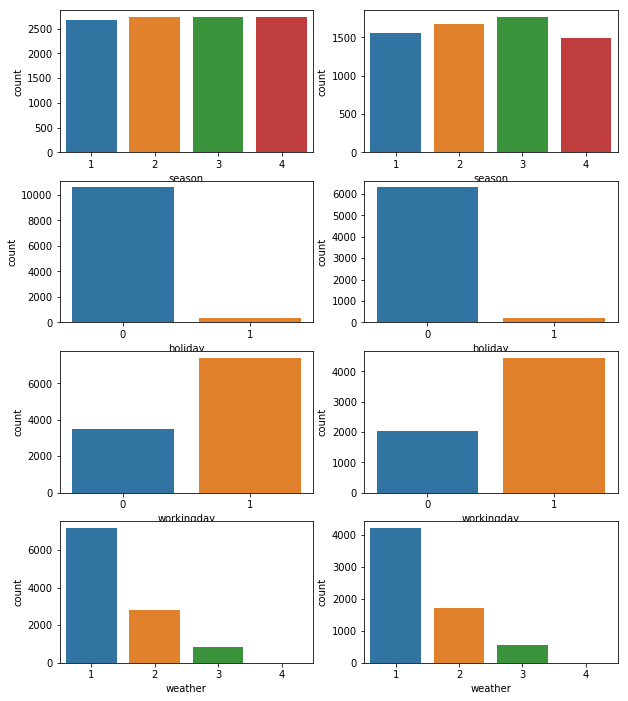

In [51]:
col_names = [ 'season', 'holiday', 'workingday', 'weather' ]
i = 0
plt.figure(figsize=(10,12)) 

for name in col_names: 
  i = i + 1 
  plt.subplot(4,2,i) 
  sns.countplot(name, data=train) 
  
  i = i + 1 
  plt.subplot(4,2,i) 
  sns.countplot(name, data=test)
plt.show() 

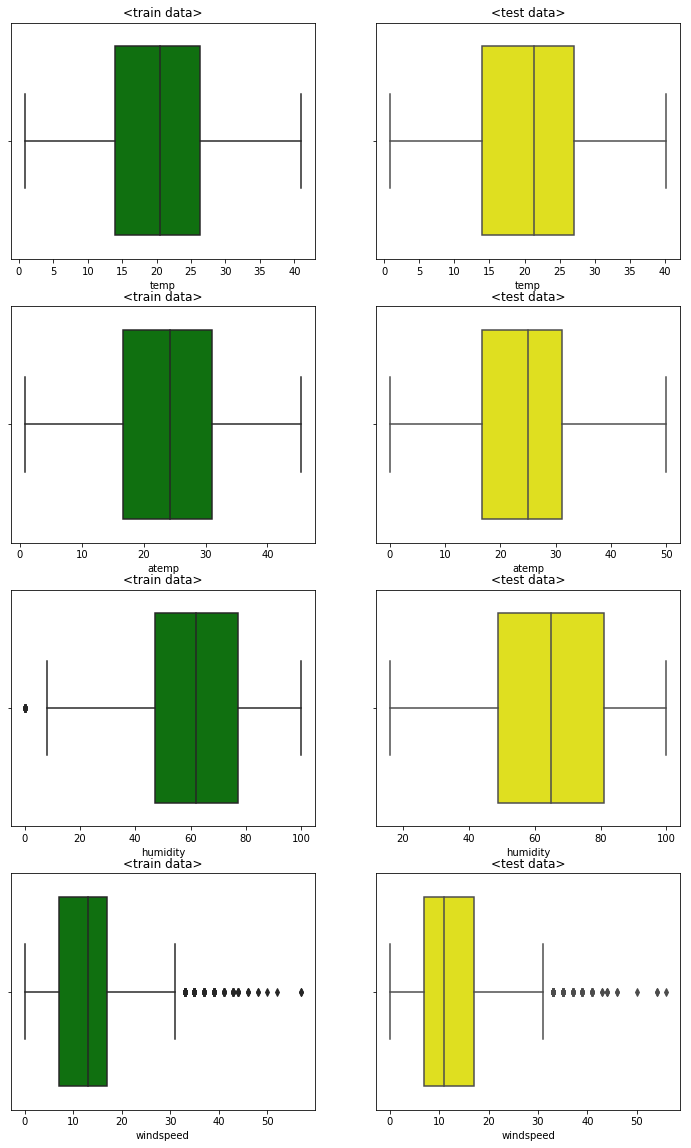

In [61]:
col_names1 = ['temp','atemp', 'humidity', 'windspeed']
i = 0
plt.figure(figsize=(12,20))

for name in col_names1:
  i = i +1
  plt.subplot(4,2,i)
  sns.boxplot(name, data=train, color='green')
  plt.title('<train data>')
  
  i = i +1
  plt.subplot(4,2,i)
  sns.boxplot(name, data=test, color='yellow')
  plt.title('<test data>')
plt.show()

In [0]:
# col_names1 = ['temp','atemp', 'humidity', 'windspeed']
# i = 0
# plt.figure(figsize=(12,15))

# for name in col_names1:
#   i = i +1
#   plt.subplot(4,2,i)
#   sns.distplot(name, data=train)
  
#   i = i +1
#   plt.subplot(4,2,i)
#   sns.distplot(name, data=test)
  
# plt.show()

In [69]:
print(train.datetime.dt.year.head())
print(train['datetime'].dt.year.head())

0    2011
1    2011
2    2011
3    2011
4    2011
Name: datetime, dtype: int64
0    2011
1    2011
2    2011
3    2011
4    2011
Name: datetime, dtype: int64


In [0]:
new_tr = train.copy()
new_te = test.copy()

In [92]:
new_tr['year'] = new_tr.datetime.dt.year
new_tr['month'] = new_tr.datetime.dt.month
new_tr['day'] = new_tr.datetime.dt.day
new_tr['hour'] = new_tr.datetime.dt.hour
new_tr['minute'] = new_tr.datetime.dt.minute
new_tr['second'] = new_tr.datetime.dt.second
new_tr['dayofweek'] = new_tr.datetime.dt.dayofweek

new_tr[['year','month','day','hour','dayofweek']].head(24)

,year,month,day,hour,dayofweek
0,2011,1,1,0,5
1,2011,1,1,1,5
2,2011,1,1,2,5
3,2011,1,1,3,5
4,2011,1,1,4,5
5,2011,1,1,5,5
6,2011,1,1,6,5
7,2011,1,1,7,5
8,2011,1,1,8,5
9,2011,1,1,9,5


In [77]:
new_te['year'] = new_te.datetime.dt.year
new_te['month'] = new_te.datetime.dt.month
new_te['day'] = new_te.datetime.dt.day
new_te['hour'] = new_te.datetime.dt.hour
new_te['minute'] = new_te.datetime.dt.minute
new_te['second'] = new_te.datetime.dt.second

new_te[['year','month','day','hour']].head(24)

,year,month,day,hour
0,2011,1,20,0
1,2011,1,20,1
2,2011,1,20,2
3,2011,1,20,3
4,2011,1,20,4
5,2011,1,20,5
6,2011,1,20,6
7,2011,1,20,7
8,2011,1,20,8
9,2011,1,20,9


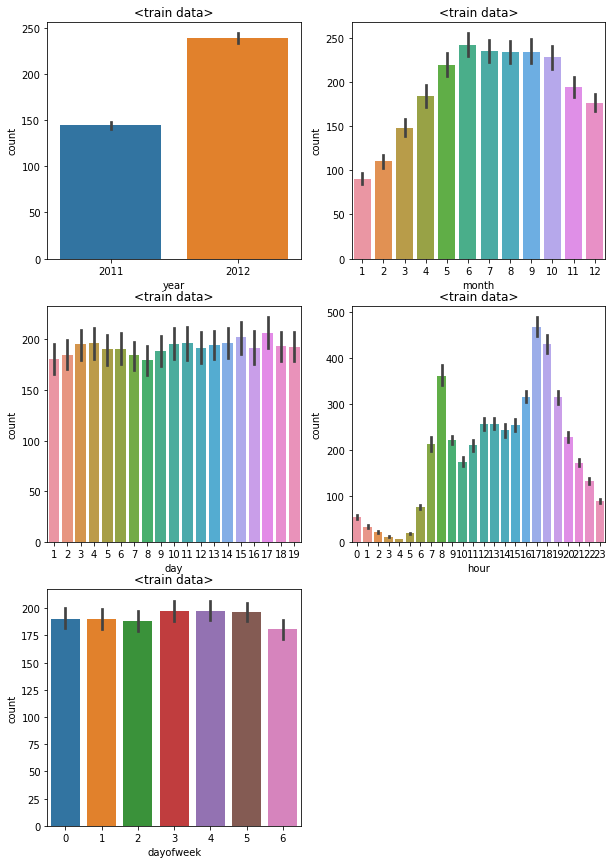

In [93]:
col_names1 = ['year','month','day','hour','dayofweek']
i = 0
plt.figure(figsize=(10,20))

for name in col_names1:
  i = i +1
  plt.subplot(4,2,i)
  sns.barplot(x=name, y='count',data=new_tr)
  plt.title('<train data>')
  
plt.show()

In [0]:
new_tr = new_tr.drop(['minute','second'], axis=1)

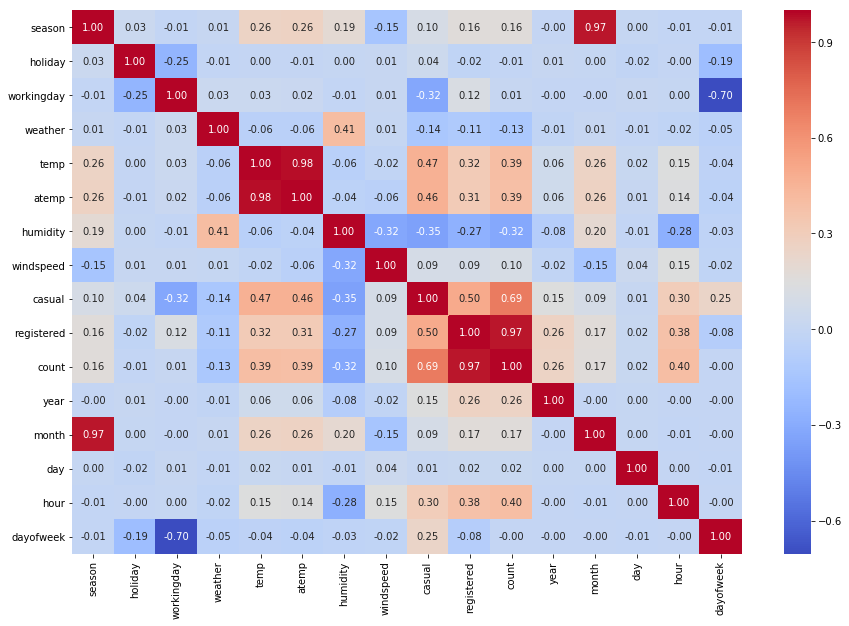

In [97]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [0]:
col = ['atemp', 'humidity', 'windspeed','year','hour']
x_tr = new_tr[col]
y_tr = new_tr['count']

In [114]:
model_1 = RandomForestRegressor(random_state=0)
model_1.fit(x_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
x_te = new_te[col]

In [116]:
y_pre_1 = model_1.predict(x_te)
y_pre_1

array([ 27.5 ,  13.5 ,  12.2 , ...,  79.7 , 100.65,  48.9 ])

In [0]:
sub = pd.read_csv('sampleSubmission.csv')

In [118]:
print(x_te.shape)
print(sub.shape)

(6493, 5)
(6493, 2)


In [119]:
sub.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [0]:
sub['count'] = y_pre_1

In [0]:
sub.to_csv('randomforest_datetime_model.csv', index=False)

# RMLSE

In [0]:
from sklearn.metrics import 

In [0]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    diff = log_predict - log_actual
    squared_diff = diff ** 2
    mean_squared_diff = squared_diff.mean()
    score = np.sqrt(mean_squared_diff)
    return score

In [0]:
from sklearn.metrics import make_scorer

In [138]:
rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [0]:
from sklearn.model_selection import cross_val_score

In [141]:
## 선형회귀
model1 = LinearRegression()
model1.fit(x_train, y_train)
score = cross_val_score(model1, x_train, y_train, 
                        cv=5, scoring=rmsle_score)
print(score)
print("MSE 평균 :", score.mean())

[       nan 1.46949994        nan 1.33666098 1.2387139 ]
MSE 평균 : nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [132]:
## knn
score = cross_val_score(model2, x_train, y_train, 
                        cv=5, scoring=rmsle_score)
print(score)
print("MSE 평균 :", score.mean())

[1.65232933 1.46133901 1.41753949 1.37259429 1.31513401]
MSE 평균 : 1.4437872248678945


In [133]:
## 랜덤포레스트
score = cross_val_score(model3, x_train, y_train, 
                        cv=5, scoring=rmsle_score)
print(score)
print("MSE 평균 :", score.mean())

[1.70130586 1.47625531 1.46489946 1.4024168  1.3711194 ]
MSE 평균 : 1.4831993673681718


In [0]:
import xgboost as xgb


In [143]:
xg_reg = xgb.XGBRegressor()
xg_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)